<a href="https://colab.research.google.com/github/The-Quantum/Coursera_Capstone/blob/master/Images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
#train_images = train_images[0:10000]
#train_labels = train_labels[0:10000]
#test_images = train_images[0:1000]
#test_labels = train_labels[0:1000]
train_images, test_images = train_images/255, test_images/255

In [13]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [21]:
#Conv2D(32, (3, 3), input_shape=x_train.shape[1:], use_bias=False, kernel_regularizer=l2(0.01))
model = models.Sequential([tf.keras.layers.Reshape((28, 28, 1)),
                           tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128, activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(10)
                           ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

#model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28, 28)),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(10)
#])

#model.add(layers.Flatten())
#model.add(layers.Dense(126, activation="relu"))
#model.add(layers.Dense(10, activation='softmax'))

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1999 - accuracy: 0.9474 - val_loss: 0.0851 - val_accuracy: 0.9792
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0731 - accuracy: 0.9802 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0514 - accuracy: 0.9862 - val_loss: 0.0708 - val_accuracy: 0.9829
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0704 - val_accuracy: 0.9834
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0338 - accuracy: 0.9916 - val_loss: 0.0965 - val_accuracy: 0.9785
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0307 - accuracy: 0.9925 - val_loss: 0.0968 - val_accuracy: 0.9817
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - accuracy: 0.9932 - val_loss: 0.0806 - val_acc

In [3]:
model.summary()

NameError: ignored

In [14]:
input_shape = (1, 28, 28, 1)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))(x)
#y = tf.keras.layers.Flatten(input_shape=(28, 28))(x)
#y = model(x)
print(x.shape, input_shape[1:])
print(y.shape)

(1, 28, 28, 1) (28, 28, 1)
(1, 26, 26, 32)


In [7]:
train_images.shape

(60000, 28, 28)

In [86]:
model = models.Sequential([tf.keras.layers.Reshape((28, 28, 1)),
                           layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                           layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(14, (3,3), activation='relu'),
                           layers.Flatten(),
                           layers.Dense(126, activation="relu"),
                           layers.Dense(10, activation='softmax')
                           ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [87]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), validation_steps=10)


Epoch 1/15
32/32 [==============================] - 1s 24ms/step - loss: 1.8725 - accuracy: 0.3630 - val_loss: 1.0273 - val_accuracy: 0.6734
Epoch 2/15
32/32 [==============================] - 0s 11ms/step - loss: 0.7273 - accuracy: 0.7760 - val_loss: 0.5989 - val_accuracy: 0.8089
Epoch 3/15
32/32 [==============================] - 0s 11ms/step - loss: 0.4572 - accuracy: 0.8660 - val_loss: 0.5036 - val_accuracy: 0.8451
Epoch 4/15
32/32 [==============================] - 0s 11ms/step - loss: 0.3484 - accuracy: 0.9010 - val_loss: 0.3535 - val_accuracy: 0.8894
Epoch 5/15
32/32 [==============================] - 0s 11ms/step - loss: 0.2387 - accuracy: 0.9310 - val_loss: 0.3157 - val_accuracy: 0.8999
Epoch 6/15
32/32 [==============================] - 0s 11ms/step - loss: 0.2057 - accuracy: 0.9430 - val_loss: 0.2787 - val_accuracy: 0.9128
Epoch 7/15
32/32 [==============================] - 0s 11ms/step - loss: 0.1542 - accuracy: 0.9560 - val_loss: 0.2879 - val_accuracy: 0.9123
Epoch 8/15
32

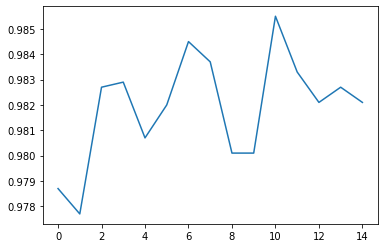

In [19]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')

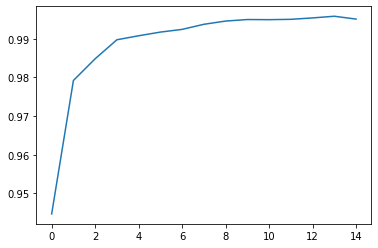

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')

In [38]:
input_shape = (1, 28, 28, 1)
x = tf.random.normal(input_shape)
#y = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))(x)
#y = tf.keras.layers.Flatten(input_shape=(28, 28))(x)
y = model(x)
print(input_shape[1:])
print(y.shape)

(28, 28, 1)
(1, 10)


In [9]:
tf.__version__

'2.3.0'

(28, 28) (10000, 28, 28)


<function matplotlib.pyplot.show>

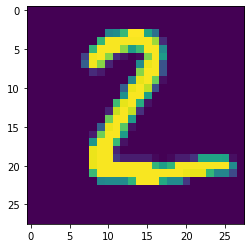

In [45]:
print(train_images.shape[1:], test_images.shape)
plt.imshow(test_images[1])
plt.show